#### Problem 1

Please do Exercise 1.11 on page 25 of Learning From Data. 


<b>Exercise 1.11</b><br>
<b>We are given a data set $D$ of 25 training examples from an unknown target function $f$: $\mathcal{X}$→$\mathcal{Y}$, where $\mathcal{X}$ = $\mathbb{R}$ and $\mathcal{Y}$ = {$-1, +1$}. To learn $f$, we use a simple hypothesis set $\mathcal{H}$ = {$h_{1}, h_{2}$}, where $h_{1}$ is the constant $+1$ function and $h_{2}$ is the constant $-1$.<br>

We consider two learning algorithms, S (smart) and C (crazy). S chooses the  hypothesis that agrees the most with $\mathcal{D}$ and C chooses the other hypothesis deliberately. Let us see how these algorithms perform out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probability distribution on $\mathcal{X}$, and let $\mathbb{P}[f(x)=+1]=p.$</b><br>

<b>(a) Can S produce a hypothesis that is <i>guaranteed</i> to perform better than random on any point outside $D$?</b><br>

<b>(b) Suppose that all the examples in $\mathcal{D}$ have $y_{n} = +1.$ Is it <i>possible</i> that the hypothesis that C produces turns out to be better than the hypothesis that S produces?</b><br>

<b>(c) If $p$ = 0.9, what is the probability that S will produce a better hypothesis than C?</b><br>

<b>(d) Is there any value of $p$ for which it is more likely than not that C will produce a better hypothesis than S?</b><br>


#1:

a) no.  It's possible all values in $\mathcal{D}$ are +1 when $p=0.1$. Then the out of sample error of $S$ is 90%, but the out of sample error of a random strategy is 50%.  

b) yes, because there is a nonzero chance this will happen if $p=0.1$, for example.  Then S has out of sample error 90% and C has out of sample error 10%.

c) The right hypothesis when $p=0.9$ is $h_1$. S will select $h_1$ and C will select $h_2$ so long as the sample $\mathcal{D}$ is representative.  That means 13 or more of the datapoints are classified +1. 

The probability that this happens is given by the binomial distribution with $p=0.9$ and $n=25$. The random variable $X$ is the number of "successes" in 25 Bernoulli trials, where a "success" is a +1 classification.

$$P[X \geq 13;p] = \sum_{i=13}^{25} p^i(1-p)^{25-i}\binom{25}{i}$$

The following cell computes this value.


In [1]:
from scipy.special import binom

sum(0.9**i*0.1**(25-i)*binom(25,i) for i in range(13,26))

0.9999998379165849


d) No. If $p \geq 0.5$ the probability that a sample is unrepresentative is the probability that there are at most 12 +1's in $\mathcal{D}$:

$$P[X \leq 12; p] = \sum_{i=0}^{12}p^i(1-p)^{25-i}\binom{25}{i}$$

We can use calculus to show that the sum on the right is bounded above by 0.5 when $p \geq 0.5$.

On the other hand if $p < 0.5$ the probability that a sample is unrepresentative is 

$$P[X \geq 13; p] = \sum_{i=13}^{25}p^i(1-p)^{25-i}\binom{25}{i}$$


We can use calculus to show that the sum on the right is bounded above by 0.5 when $p<0.5$.


So in either case with likelihood at least 0.5, S makes the better decision. 

A picture is given below.



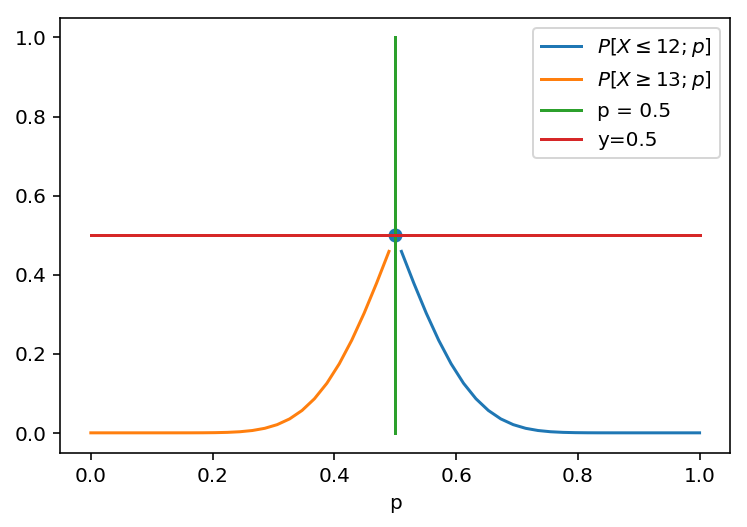

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0,1)
y = sum(p**i*(1-p)**(25-i)*binom(25,i) for i in range(13))
yy= sum(p**i*(1-p)**(25-i)*binom(25,i) for i in range(13,26))
plt.plot(p[25:],y[25:],label=r"$P[X \leq 12;p]$")
plt.plot(p[:25],yy[:25],label=r"$P[X \geq 13;p]$")
plt.scatter([0.5],[0.5])
plt.plot([0.5,0.5],[0,1],label=r"p = 0.5")
plt.plot(p,[0.5]*len(p),label=r"y=0.5")
plt.xlabel("p")
plt.legend()
plt.show()

#### Problem 2

Please do Exercise 1.12 on page 26 of Learning From Data.  Explain why the options you discarded are not accurate.  

<b>Exercise 1.12</b><br>
<b>A friend comes to you with a learning problem. She says the target function $f$ is <i>completely</i> unknown, but she has 4,000 data points. She is willing to pay you to solve her problem and produces for her a $g$ which approximates $f$. What is the best that you can promise her among the following:<br>
(a) After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.<br>
(b) After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample.<br>
(c) One of two things will happen.<br>
$\hspace{0.5cm}$(i)You will produce a hypothesis $g$;<br>
$\hspace{0.5cm}$(i)You will declare that you failed.<br>
    $\hspace{0.5cm}$If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate $f$ well out of sample.</b><br><br>


The basic problem here is that if $f$ is very complex, 4000 datapoints might not be enough data for us to find a complex hypothesis with good generalization. Think about a learning curve that reflects this situation... We need the asymptote to be low (for $g \approx f$). Suppose $f$ is complex, and $\mathcal{H}$ that has test error converging to this low asymptote as $N \to \infty$.  If $f$ is sufficiently complex, the test error curve will not meet the training error curve until well after $N=4000$. 



a) We cannot make this promise... Consider the case in which $f$ is totally random.  The performance of $f$ on the data does not constrain what $f$ does off the training data in any way.


b) No.  Again, $f$ may be totally random. In that case any $g$ will have a 50% error rate with 100% probability.

c) Although it is not stated, we assume that the 4000 datapoints are randomly chosen, and therefore test error approximates out of sample error. Under this assumption there is a chance that our final $g$ has very low test error.  In this case we can give $g$ to the customer, and it should work well.  But if $g$ does not have low test error, we have to admit that we failed. The answer to this part is "yes".




#### Problem 3

Please do Exercise 2.5 on page 56 of Learning From Data.  Be sure to show your calculations.  

<b>Exercise 2.5</b><br>
Suppose we have a simple learning model whose growth function is $m_\mathcal{H}(N) = N + 1$, hence $d_{vc} = 1$. Use the VC bound (2.12) to estimate the probability that $E_{out}$ will be within 0.1 of $E_{in}$ given 100 training examples. <i>[Hint: The estimate will be ridiculous.]</i>


(This solution is Kristy Li's)
 
$E_{out}(g) \leq E_{in}(g) + \sqrt{\dfrac{8}{N}\ln\dfrac{4m_\mathcal{H}(2N)}{\delta}}$, where $m_\mathcal{H}(2N)=2N+1$ and $N=100$. <br>

Therefore, $m_\mathcal{H}(200) = 200 + 1 =201.$<br><br>
$0.1 = \sqrt{\dfrac{8}{100}\ln\dfrac{4*m_\mathcal{H}(2*100)}{\delta}}$<br><br>
$0.1 = \sqrt{\dfrac{8}{100}\ln\dfrac{(4*201)}{\delta}}$<br><br>
$0.1 = \sqrt{\dfrac{8}{100}\ln\dfrac{(804)}{\delta}}$<br><br>
$(0.1)^2 = (\sqrt{\dfrac{8}{100}\ln\dfrac{(804)}{\delta}})^2$<br><br>
$0.01 = \dfrac{8}{100}\ln\dfrac{(804)}{\delta}$<br><br>
$100 * 0.01 = 100 * \dfrac{8}{100}\ln\dfrac{(804)}{\delta}$<br><br>
$1 = 8\ln\dfrac{(804)}{\delta}$<br><br>
$\dfrac{1}{8} = \dfrac{8\ln\dfrac{(804)}{\delta}}{8}$<br><br>
$\dfrac{1}{8} = \ln\dfrac{(804)}{\delta}$<br><br>
$\mathcal{e}^{1/8} = \mathcal{e}^{\ln(804/\delta)}$<br><br>
$\mathcal{e}^{1/8} = \dfrac{804}{\delta}$<br><br>
$\dfrac{\mathcal{e}^{1/8}}{1} = \dfrac{804}{\delta}$<br><br>
$\mathcal{e}^{1/8}{\delta} = 804$<br><br>
$\dfrac{\mathcal{e}^{1/8}{\delta}}{\mathcal{e}^{1/8}} = \dfrac{804}{\mathcal{e}^{1/8}}$<br><br>
$\delta = \dfrac{804}{\mathcal{e}^{1/8}}$<br><br>
$\delta = 709.5275096780147$<br><br>

#### Problem 4

Please do Exercise 2.6 on page 60 of Learning From Data.

<b>Exercise 2.6</b><br>
<b>A dataset has 600 examples. To properly test the performance of the final hypothesis, you set aside a randomly selected subset of 200 examples which are never used in the training phase, these form a test set. You use a learning model with 1,000 hypotheses and select the final hypothesis <i>$g$</i> based on 400 training examples. We wish to estimate $E_{out}(g)$. We have access to two estimates, $E_{in}(g)$, the in-sample error on the 400 training examples, and, $E_{test}(g)$, the test error on the 200 test examples that were set aside.</b><br>

<b>(a) Using a 5% error tolerance ($\delta$ =0.05), which estimate has the higher 'error bar'?</b><br>


Because the mention $M=1000$ it makes the most sense to use the Formula 2.1 on page 40.

$$E_{out}(g) \leq E_{in}(g) + \sqrt{\frac{1}{2N}\ln(\frac{2M}{\delta})}$$

For $E_{in}$ on the 400 training examples, $\sqrt{\frac{1}{2N}\ln(\frac{2M}{\delta})} = \sqrt{\frac{1}{800}\ln(\frac{2000}{0.05})} = 0.11509037065006825$

For $E_{test}$ on the 200 test examples, $\sqrt{\frac{1}{2N}\ln(\frac{2M}{\delta})} = \sqrt{\frac{1}{400}\ln(\frac{2}{0.05})} = 0.09603227913199208
$

Therefore the test error is a better estimator for $E_{out}$.


In [3]:
import numpy as np
np.sqrt(1/400*np.log(2/0.05))

0.09603227913199208

<b>(b) Is there any reason why you shouldn't reserve even more examples for testing?</b><br>


Yes, this will leave fewer data available for training and the training error will get worse.  If the final model is not retrained on all data, this will also make the out of sample error go up.  This situation is described in Figure 4.8 on page 140.


#### Problem 5
Please do Problem 2.8 on page 70 of Learning From Data.


<b>Problem 2.8</b><br>
<b>Which of the following are possible growth functions $m_\mathcal{H}(N)$ for some hypothesis set: </b><br>
<b>$1+N; 1+N+\dfrac{N(N-1)}{2}; 2^N; 2^{\lfloor \sqrt{N}\rfloor}; 2^{\lfloor{N/2}\rfloor}; 1+N+\dfrac{N(N-1)(N-2)}{6}$</b><br>


Sauer's Lemma says that the growth function is either $2^N$ or else it is polynomially bounded.  So we can eliminate all the growth functions that are not $2^{N}$ or polynomially bounded.  These are  $2^{\lfloor\sqrt{N}\rfloor}$ and $2^{\lfloor{N/2}\rfloor}$.

There is a subtle reason that  $1+N+\dfrac{N(N-1)(N-2)}{6}$ does not work. 

Suppose $m(N) = 1+N+\dfrac{N(N-1)(N-2)}{6}$.

By Sauer's Lemma (Theorem 2.4) if $m$ is a growth function and $m(d) < 2^{d+1}$ for any $d$ then $m(N) \leq \sum_{i=0}^d\binom{N}{i}$ for all $N$.

Observe that 
$1+d+\dfrac{d(d-1)(d-2)}{6} < 2^{d+1}$ when $d=1$.

But $1+N+\dfrac{N(N-1)(N-2)}{6} > \binom{N}{0}+\binom{N}{1} = N+1$ for $N>2$.

Therefore $1+N+\dfrac{N(N-1)(N-2)}{6}$ cannot be a growth function.




#### Problem 6
Please do Problem 2.1 on page 69 of Learning From Data. 

<b>Problem 2.1</b><br>
<b>In equation (2.1), set ($\delta$ = 0.03) and let <br>
$\hspace{1cm}\epsilon(M, N, \delta$) = $\sqrt{\dfrac{1}{2N}\ln\dfrac{2M}{\delta}}$.<b><br>

<b>(a) For $M = 1$, how many examples do we need to make $\epsilon \leq 0.05$?</b><br><br>


<b>(b) For $M = 100$, how many examples do we need to make $\epsilon \leq 0.05$?</b><br><br>


<b>(c) For $M = 10,000$, how many examples do we need to make $\epsilon \leq 0.05$?</b><br><br>


From $\hspace{1cm}\epsilon(M, N, \delta$) = $\sqrt{\dfrac{1}{2N}\ln\dfrac{2M}{\delta}} < x$ we can derive

$$ N > \frac{1}{2x^2}\ln(\frac{2M}{\delta}).$$

We use this formula to solve for (a),(b) and (c) in the code below.



In [4]:
import numpy as np
eps = lambda x,M,delta: 1/(2*x**2)*np.log(2*M/delta)

#a
print("(a): N >",eps(0.05,1,0.03))

#b
print("(b): N >",eps(0.05,100,0.03))

#c
print("(c): N >",eps(0.05,10000,0.03))


(a): N > 839.9410155759854
(b): N > 1760.9750527736035
(c): N > 2682.009089971222


#### Problem 7

Suppose $\mathcal{X} = \{1,2,3,\ldots,99,100\}$.  For any subset $k \subseteq \mathcal{X}$ define $h_k: \mathcal{X} \rightarrow \{1,-1\}$ by 

 \begin{equation}
h_k(x) = \begin{cases}
      +1 & \text{ if } x\in k \\
      -1        & \text{otherwise}
    \end{cases}
  \end{equation}
  
Suppose $\mathcal{H} = \{h_k: k \subseteq \mathcal{X}\text{ and } |k|\geq 90\}$.  What is the VC dimension of $\mathcal{H}$? 

Hints:
1. Start by trying to shatter some simple sets like $\{1\}$, $\{1,2\}$ and $\{1,2,3\}$ just to get a feel for the problem. 
1. To show that the VC dimension is $\geq d$, exhibit a shattered set of size $d$.
1. To show that the VC dimension is $\leq d$, argue that no subset of size $d+1$ can be shattered.
1. Think about $\mathcal{J} = \{h_k: k \subseteq \mathcal{X}\text{ and } |k| \leq 10\}$. Do you find this one simpler to analyze?  What is the connection between $\mathcal{H}$ and $\mathcal{J}$ in terms of shattered sets? 

Answer: 


$\mathcal{H} = \{h_k: k \subseteq \mathcal{X}\text{ and } |k|\geq 90\}$ shatters exactly the same sets as $\mathcal{J} = \{h_k: k \subseteq \mathcal{X}\text{ and } |k| \leq 10\}$.

To see why this is true consider any $S \subseteq \{1,2,3,\ldots,99,100\}$ and a dichotomy $h_+: S \to \{-1,+1\}$ on $S$.  Notice that $\mathcal{H}$ contains $h_+$ if and only if $\mathcal{J}$ contains $h_-(s) = 2h_+(s) -1$ (the complement of $h_+$).  For $S$ to be shattered, both $h_+$ and $h_-$ are required.  Thus if either $\mathcal{H}$ or $\mathcal{J}$ contains $h_+$ and $h_-$, then the other does as well.  This implies that $\mathcal{H}$ and $\mathcal{J}$ shatter exactly the same sets. 

But the VC dimension of $\mathcal{J}$ is clearly 10. Therefore the VC dimension of $\mathcal{H}$ is also 10. 
